# Business Case

# Company Overview:

Company X is a leading micro-mobility service provider in India, offering innovative vehicles designed for daily commutes. Established with a mission to reduce traffic congestion, the company provides a safe and sustainable commuting solution through a user-friendly mobile app, enabling shared, solo, and eco-friendly travel.

Strategically located Company X zones are present at key locations such as metro stations, bus stops, office complexes, residential areas, and corporate hubs, ensuring convenient, affordable, and seamless first and last-mile connectivity.

Recently, Company X has experienced a decline in revenue and has engaged a consulting firm to analyze the factors influencing the demand for its shared electric cycles in the Indian market.

# How you can help here?

* The company wants to know: Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

# Column Profiling:

* datetime: datetime
* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
* weather:
    1. Clear, Few clouds, partly cloudy, partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

* temp: temperature in Celsius
* attemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered

# Useful Concept:

1. Bi-Variate Analysis
2. 2-sample t-test: testing for difference across populations
3. ANNOVA
4. Chi-square

# Analysis Flow: 

1. Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
2. Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)
3. Select an appropriate test to check whether:
    * Working Day has effect on number of electric cycles rented
    * No. of cycles rented similar or different in different seasons
    * No. of cycles rented similar or different in different weather
    * Weather is dependent on season (check between 2 predictor variable)
4. Set up Null Hypothesis (H0)
5. State the alternate hypothesis (H1)
6. Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
    * Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary
7. Set a significance level (alpha)
8. Calculate test Statistics.
9. Decision to accept or reject null hypothesis.
10. Inference from the analysis

# ==============================================

# 1. Exploratory Data 
    * Loading data
    * Checking Columns
    * Do check on nulls and column types etc

In [1]:
# Dependencies

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway, chi2_contingency, levene, shapiro

In [2]:
df = pd.read_csv("bike_sharing.CSV")

In [3]:
df

datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3          13     16  
1      13.635        80     0.0000       8          32     40  
2      13.635        80     0.0000       5          27     32  
3      14.395        75     0.0000       3          10     13  
4      14.395        75     0.0000       0           1      1  
...       ...       ...        ...     ...         ...    ...  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88  

[10886 rows x 12 columns]

In [4]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# Observation: 

    * total 10886 records with 12 variables recorded for each respnces with no null values
    * Different types of data are there like obj, int, float

In [6]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [7]:
# Check for the null values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
df['datetime'] = pd.to_datetime(df["datetime"])
df.head()
df['datetime'].dt.time

0        00:00:00
1        01:00:00
2        02:00:00
3        03:00:00
4        04:00:00
           ...   
10881    19:00:00
10882    20:00:00
10883    21:00:00
10884    22:00:00
10885    23:00:00
Name: datetime, Length: 10886, dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [10]:
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [12]:
df.describe()

datetime         temp         atemp      humidity  \
count                          10886  10886.00000  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968     20.23086     23.655084     61.886460   
min              2011-01-01 00:00:00      0.82000      0.760000      0.000000   
25%              2011-07-02 07:15:00     13.94000     16.665000     47.000000   
50%              2012-01-01 20:30:00     20.50000     24.240000     62.000000   
75%              2012-07-01 12:45:00     26.24000     31.060000     77.000000   
max              2012-12-19 23:00:00     41.00000     45.455000    100.000000   
std                              NaN      7.79159      8.474601     19.245033   

          windspeed        casual    registered         count  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean      12.799395     36.021955    155.552177    191.574132  
min        0.000000      0.000000      0.000000      1.000000  
25%        7.001500      4.000000     36.000000     42.000000  
50%       12.998000     17.000000    118.000000    145.000000  
75%       16.997900     49.000000    222.000000    284.000000  
max       56.996900    367.000000    886.000000    977.000000  
std        8.164537     49.960477    151.039033    181.144454

# Observation:
    * temp column has mean temp as 20.32 with the min 0.82 and max 41.0 with the std of 7.7915
    * atemp column has mean atemp as 23.65 with the min 0.76 and max 45.0 with the std of 8.47
    * humidity column has mean humidity as 61.88 with the min 0 and max 100 with the std of 19.24
    * windspeed column has mean speed as 12.78 with the min 0 and max 56.99 with the std of 8.1647
    * casual column has mean as 36.02 with the min 0 and max 367 with the std of 49.96
    * registred column has mean as 155.55 with the min 0 and max 886.0 with the std of 151.04
    * count column has mean as 191.57 with the min 1 and max 977.0 with the std of 111.14

In [13]:
df.describe(include= 'category')

season  holiday  workingday  weather
count    10886    10886       10886    10886
unique       4        2           2        4
top          4        0           1        1
freq      2734    10575        7412     7192

# Observation: 
* Categorical columns like season and weather has 4 unique values and holidays and workingdays has 2 unique values each
* Windter season is most frequently favoured with the occurances of 2734 times
* holiday coluns states that 10575 records are for non holidays
* workingdays are stating that 7412 days are working
* weather states that weather cat 1 is most times reported with the chrs of "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" 

2. Establish relationships between the dependent and independent variables

            datetime    season   holiday  workingday   weather      temp  \
datetime    1.000000  0.480021  0.010988   -0.003658 -0.005048  0.180986   
season      0.480021  1.000000  0.029368   -0.008126  0.008879  0.258689   
holiday     0.010988  0.029368  1.000000   -0.250491 -0.007074  0.000295   
workingday -0.003658 -0.008126 -0.250491    1.000000  0.033772  0.029966   
weather    -0.005048  0.008879 -0.007074    0.033772  1.000000 -0.055035   
temp        0.180986  0.258689  0.000295    0.029966 -0.055035  1.000000   
atemp       0.181823  0.264744 -0.005215    0.024660 -0.055376  0.984948   
humidity    0.032856  0.190610  0.001929   -0.010880  0.406244 -0.064949   
windspeed  -0.086888 -0.147121  0.008409    0.013373  0.007261 -0.017852   
casual      0.172728  0.096758  0.043799   -0.319111 -0.135918  0.467097   
registered  0.314879  0.164011 -0.020956    0.119460 -0.109340  0.318571   
count       0.310187  0.163439 -0.005393    0.011594 -0.128655  0.394454   

           

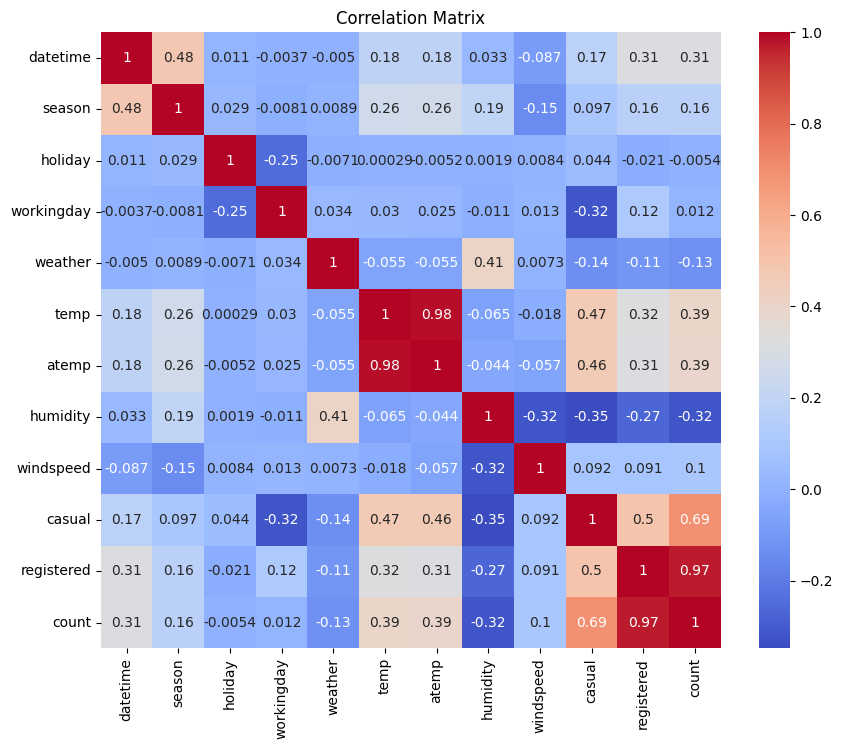

In [14]:
# Correlation matrix to check relationships
corr_matrix = df.corr()
print(corr_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
df.head()

datetime season holiday workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1       0          0       1  9.84  14.395   
1 2011-01-01 01:00:00      1       0          0       1  9.02  13.635   
2 2011-01-01 02:00:00      1       0          0       1  9.02  13.635   
3 2011-01-01 03:00:00      1       0          0       1  9.84  14.395   
4 2011-01-01 04:00:00      1       0          0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

# Exploratory Data Analysis

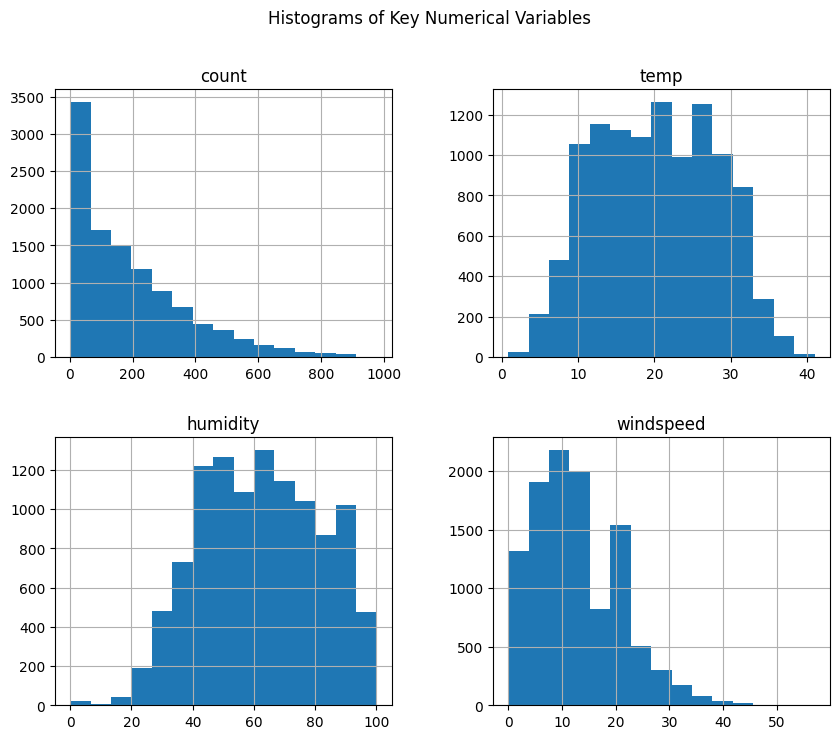

In [16]:
# Univariate Analysis:

# Plot histograms for key numerical variables
df[['count', 'temp', 'humidity', 'windspeed']].hist(bins=15, figsize=(10, 8), layout=(2, 2))
plt.suptitle('Histograms of Key Numerical Variables')
plt.show()


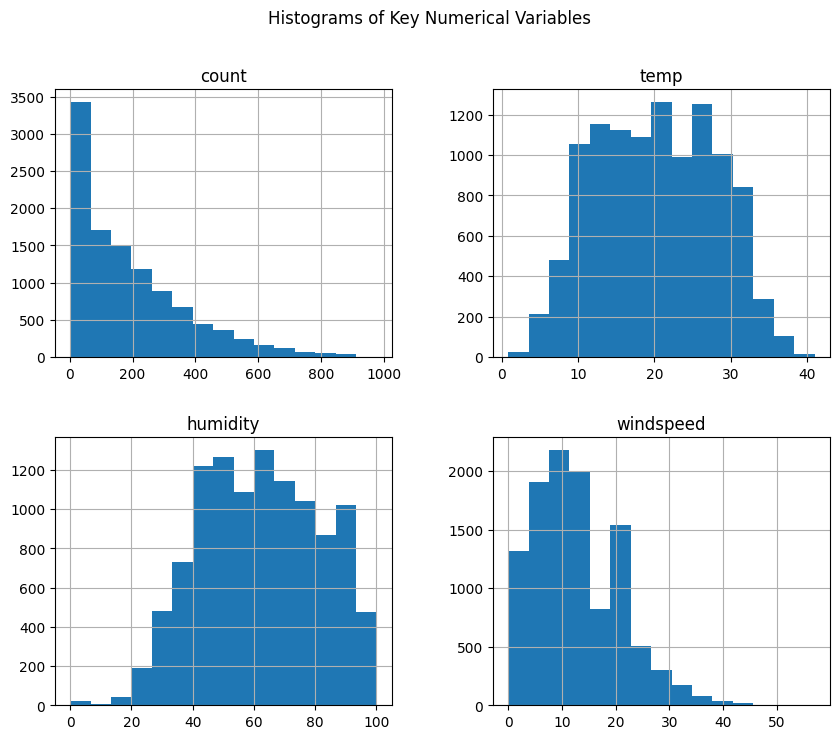

In [17]:
# Plot histograms for key numerical variables
df[['count', 'temp', 'humidity', 'windspeed']].hist(bins=15, figsize=(10, 8), layout=(2, 2))
plt.suptitle('Histograms of Key Numerical Variables')
plt.show()

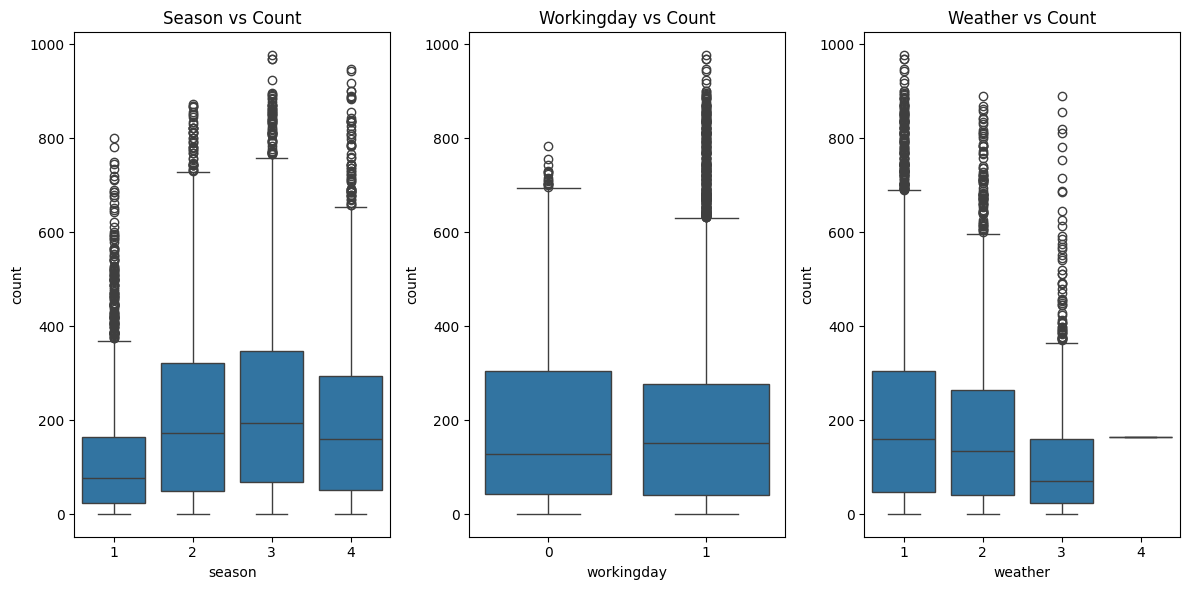

In [18]:
# Boxplot to visualize the impact of categorical variables on demand
plt.figure(figsize=(12, 6))

# Season vs Count
plt.subplot(1, 3, 1)
sns.boxplot(x='season', y='count', data=df)
plt.title('Season vs Count')

# Workingday vs Count
plt.subplot(1, 3, 2)
sns.boxplot(x='workingday', y='count', data=df)
plt.title('Workingday vs Count')

# Weather vs Count
plt.subplot(1, 3, 3)
sns.boxplot(x='weather', y='count', data=df)
plt.title('Weather vs Count')

plt.tight_layout()
plt.show()

# Observation:
* The rental count histogram is right-skewed, with most days having fewer rentals and a median lower than the mean.
* The seasonal boxplot reveals higher rentals in spring and summer, with a significant drop in winter.
* The weather boxplot shows that clear weather boosts rentals, while adverse conditions decrease them.
* Temperature distribution is nearly normal, with extremes potentially lowering rentals.
* Humidity is mostly high, while lower wind speeds dominate, possibly favoring cycling.

# Bivariate analysis

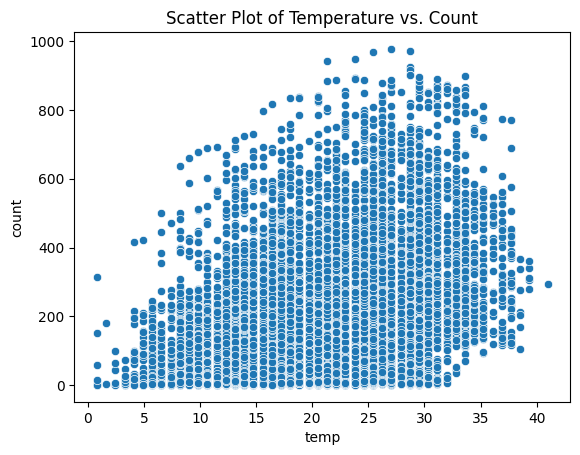

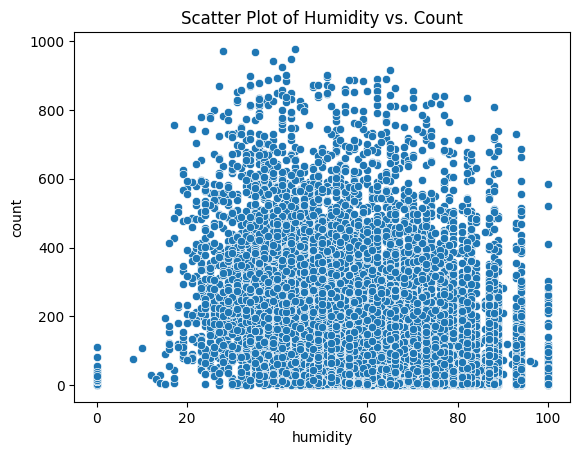

In [19]:
# Scatter plot to check the relationship between temperature and count
sns.scatterplot(x='temp', y='count', data=df)
plt.title('Scatter Plot of Temperature vs. Count')
plt.show()

# Scatter plot to check the relationship between humidity and count
sns.scatterplot(x='humidity', y='count', data=df)
plt.title('Scatter Plot of Humidity vs. Count')
plt.show()


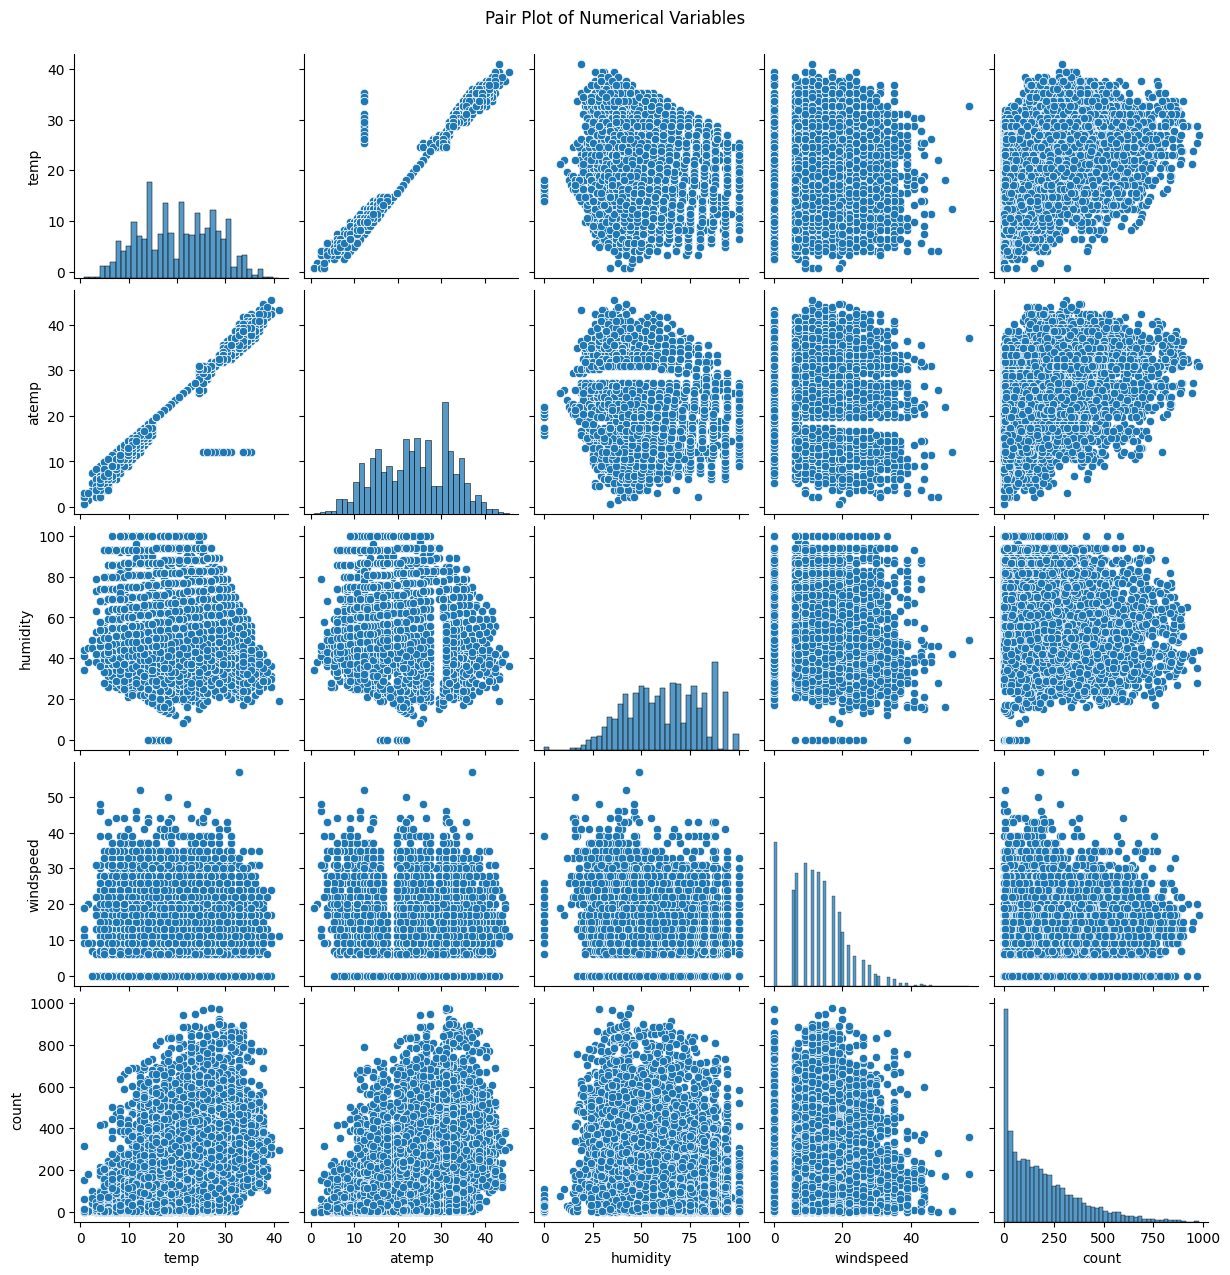

In [20]:
# Pair plot to visualize relationships among key numerical variables
sns.pairplot(df[['temp', 'atemp', 'humidity', 'windspeed', 'count']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

> With the pairplot we are not able to see the clear relation between the variables, let further drill down and try to check if we add hue like 'workingday' any effect on the relation

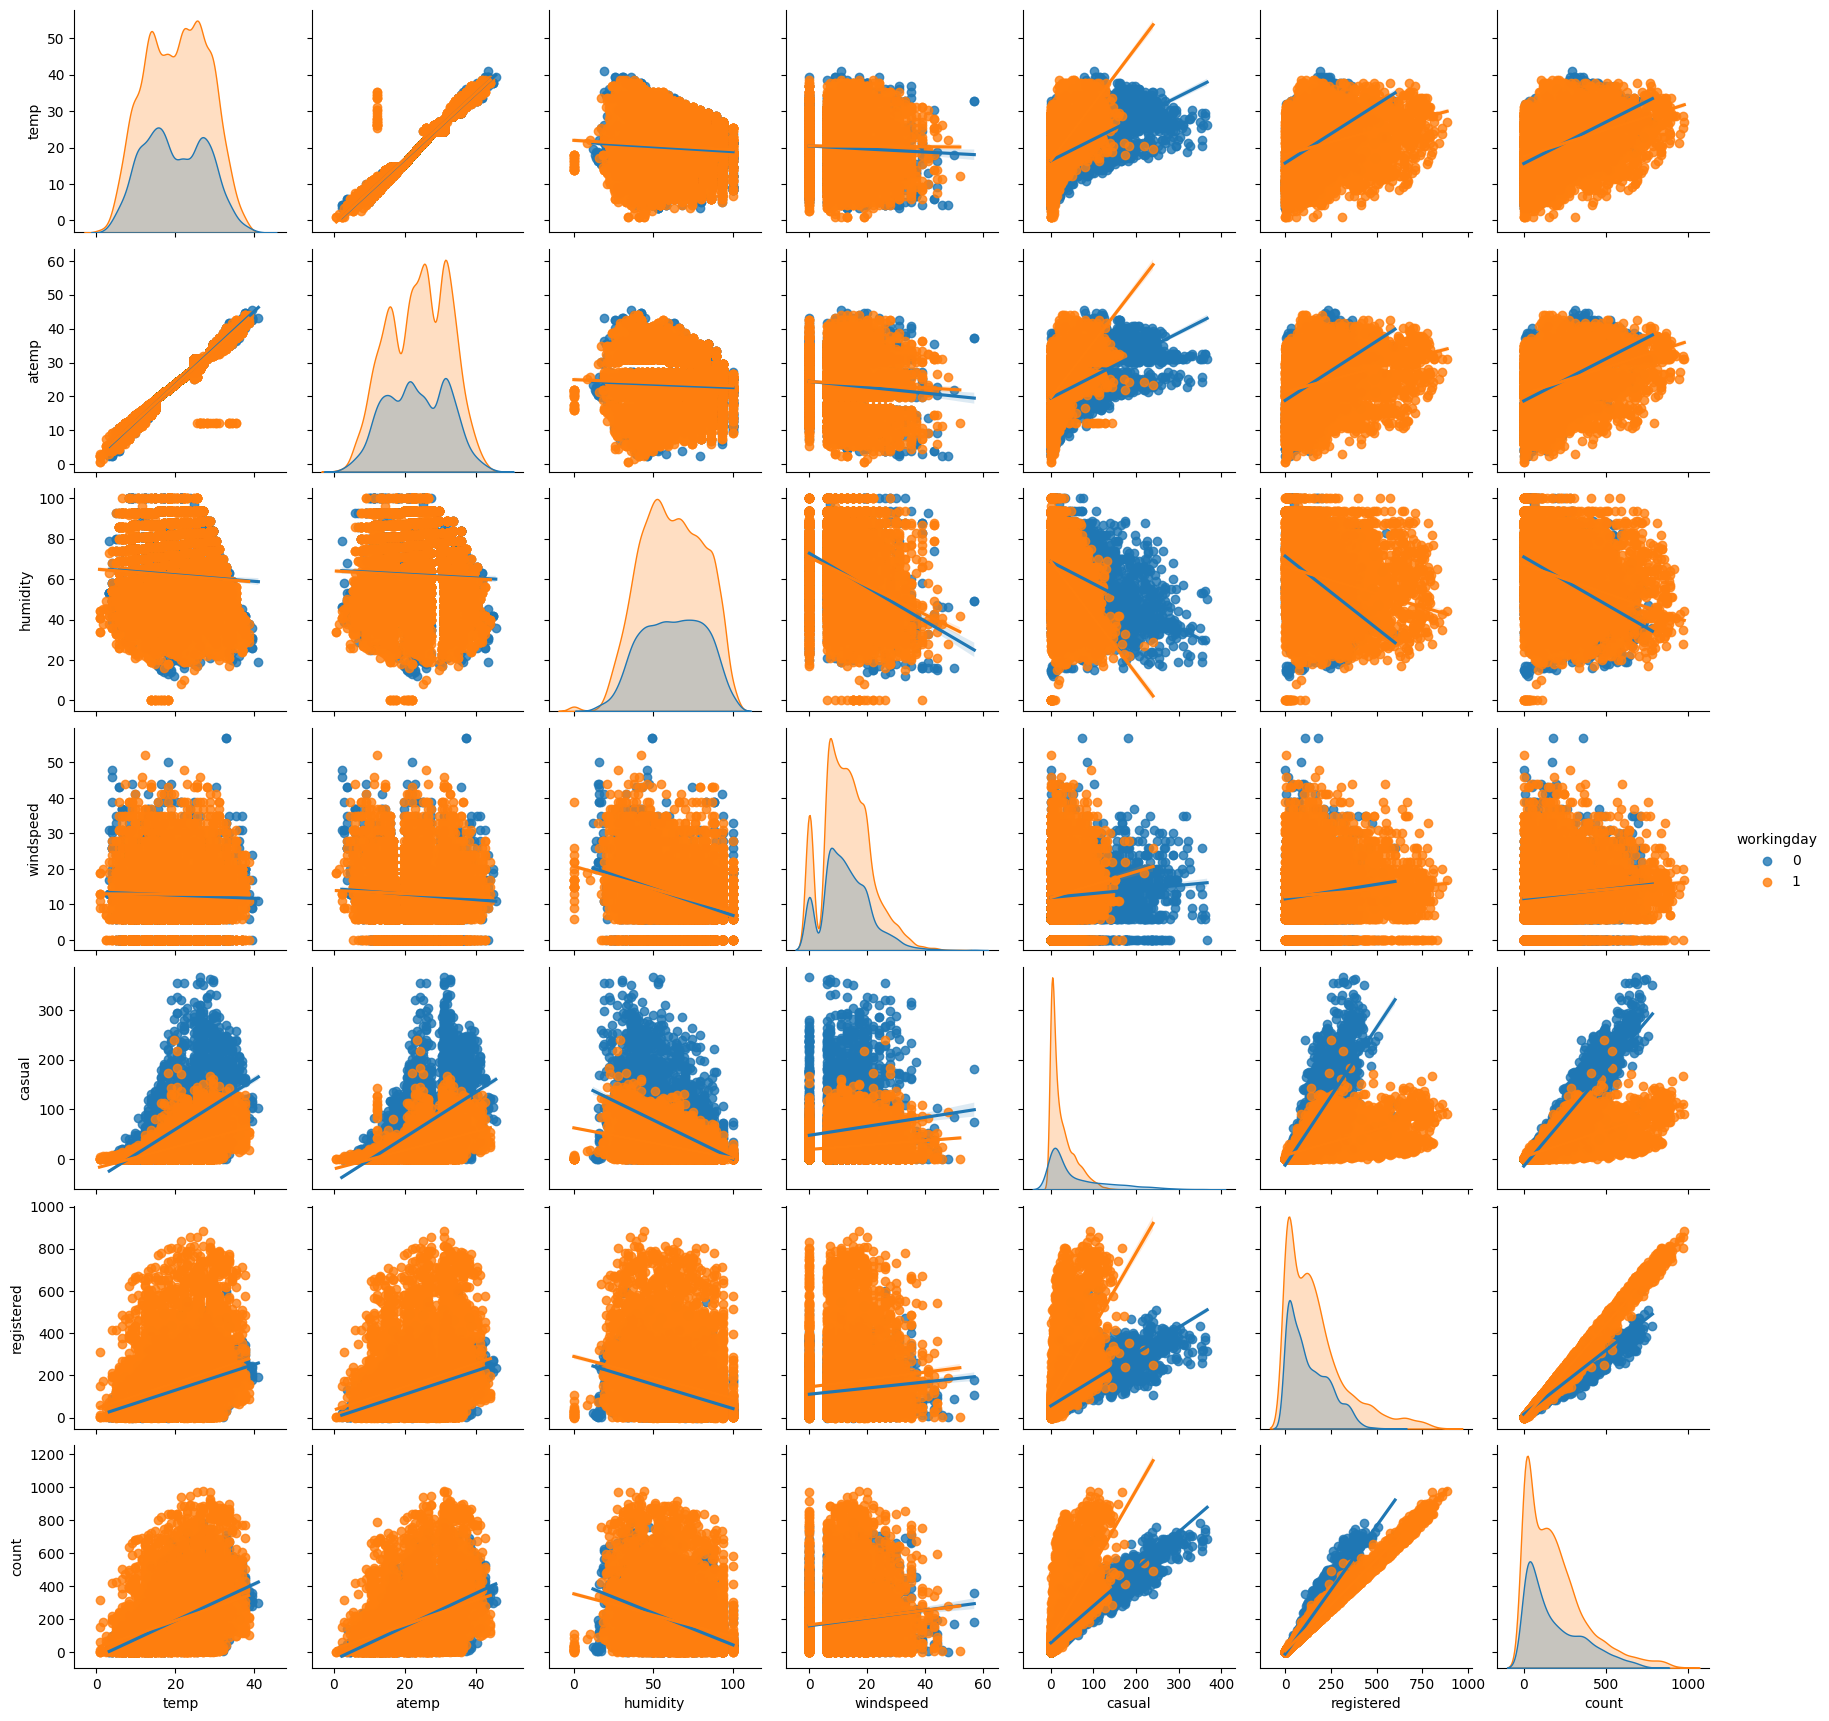

In [21]:
# Pairplot to visualize relation (using workday as hue)

sns.pairplot(data = df, kind = 'reg', hue = 'workingday')
plt.show()

> We can see in above pairplot about the relation between count vs casual, count vs registred, casual vs registred

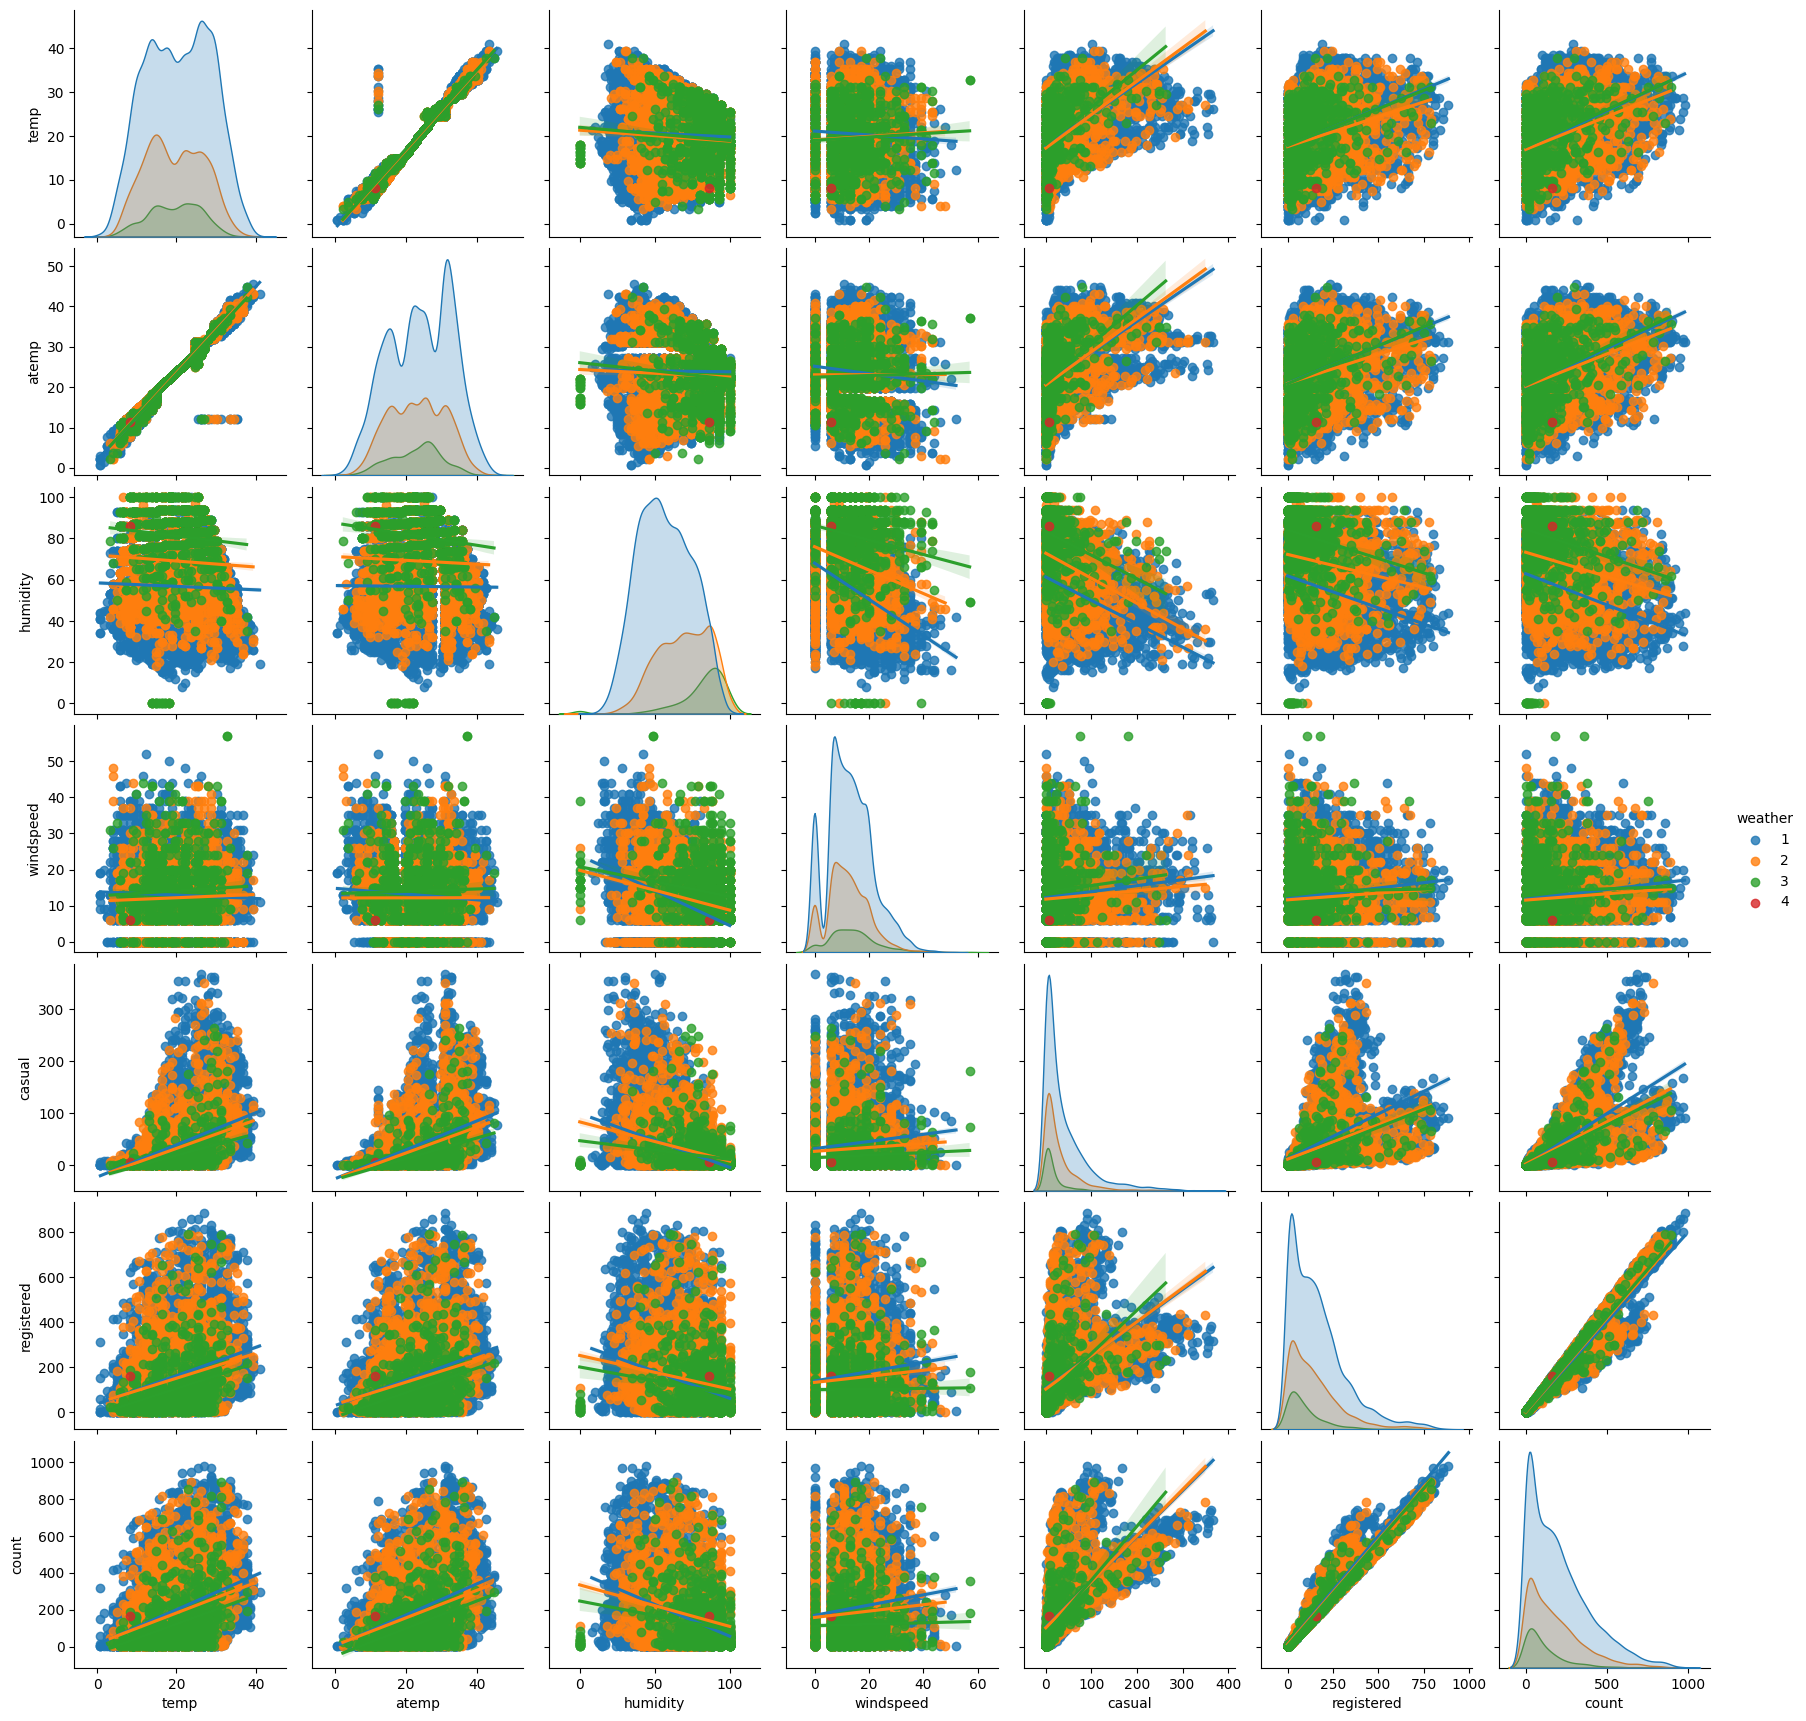

In [41]:
# Pairplot to visualize relation (using weather as hue)

sns.pairplot(data = df, kind = 'reg', hue = 'weather')
plt.show()

> By seeing the above pairplots we can see the relaions but not the strength, to check that we can plot the heatmap using correlation matrix

            datetime    season   holiday  workingday   weather      temp  \
datetime    1.000000  0.480021  0.010988   -0.003658 -0.005048  0.180986   
season      0.480021  1.000000  0.029368   -0.008126  0.008879  0.258689   
holiday     0.010988  0.029368  1.000000   -0.250491 -0.007074  0.000295   
workingday -0.003658 -0.008126 -0.250491    1.000000  0.033772  0.029966   
weather    -0.005048  0.008879 -0.007074    0.033772  1.000000 -0.055035   
temp        0.180986  0.258689  0.000295    0.029966 -0.055035  1.000000   
atemp       0.181823  0.264744 -0.005215    0.024660 -0.055376  0.984948   
humidity    0.032856  0.190610  0.001929   -0.010880  0.406244 -0.064949   
windspeed  -0.086888 -0.147121  0.008409    0.013373  0.007261 -0.017852   
casual      0.172728  0.096758  0.043799   -0.319111 -0.135918  0.467097   
registered  0.314879  0.164011 -0.020956    0.119460 -0.109340  0.318571   
count       0.310187  0.163439 -0.005393    0.011594 -0.128655  0.394454   

           

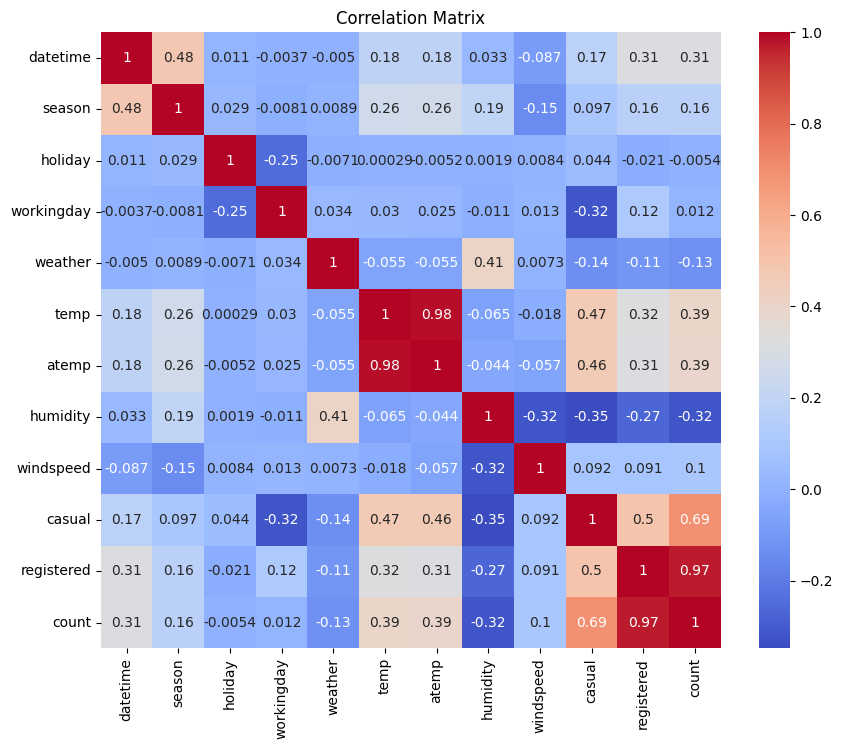

In [44]:
# Correlation matrix to check relationships
corr_matrix = df.corr()
print(corr_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Observation

* Temperature vs. Count: The scatter plot shows a positive correlation between temperature and the number of rentals. As temperature increases, the number of rentals generally increases up to a point, after which it may decline slightly, indicating an optimal temperature range for rentals.

* Humidity vs. Count: The scatter plot indicates a weak negative correlation between humidity and the number of rentals. Higher humidity might slightly reduce the number of rentals.

* Correlation Matrix: Temperature (temp) has a positive correlation with the number of rentals, suggesting that warmer temperatures encourage more rentals.
Humidity and windspeed have weaker correlations with count, indicating that while they may influence rentals, their impact is less pronounced than temperature or weather conditions.

3. Select appropriate tests
For each hypothesis, we'll choose suitable statistical tests.

        A. Working Day effect on the number of electric cycles rented
                *  Test: Independent t-test : Categorical vs Numerical

In [45]:
# 1. Does Working Day have an effect on the number of electric cycles rented?

#H0: working day has no effect on the number of cycles to be rented.

#Ha: working day has effect on the number of cycles to be rented.

# Significance level (alpha): 0.05

alpha = 0.05

In [46]:
# We have to check the interaction between the numerical vs categorical( with 2 diff vals) veriables so, for that we can use the t test

from scipy.stats import ttest_ind

# Perform t-test
workingday_rented = df[df['workingday'] == 1]['count']
non_workingday_rented = df[df['workingday'] == 0]['count']

# Check if the data has same variance using the 4:1 ratio

workingday_rented.count()/non_workingday_rented.count()

# As th results are smaller than 4:1 then we can consider that the data has no equal variance

np.float64(2.1335636154289004)

In [47]:
# Check the asumptions required for the ttest i.e., normality and homogenity of variance


# check variance homogenity using lavenes test
# h0: variances are same for 2 groups
# ha: variences are different

statistic,pvalue = levene(workingday_rented.values, non_workingday_rented.values)

print(pvalue)

# As we are failing to reject the null hypothesis then we can say the variances are same

# No as we fail, we can use the independent sample T-test for the hypothesis

0.9437823280916695


In [48]:
# 2 sample t test

t_stat_wkday, p_value_wkday = ttest_ind(workingday_rented, non_workingday_rented)
print(f"T-Statistic: {t_stat_wkday.round(3)}, P-Value: {p_value_wkday.round(3)}")

if p_value_wkday < alpha:
    print("Reject the null hypothesis for working days: working day has no effect on the number of cycles to be rented.")
else:
    print("Fail to reject the null hypothesis for working days: working day has effect on the number of cycles to be rented.")

T-Statistic: 1.21, P-Value: 0.226
Fail to reject the null hypothesis for working days: working day has effect on the number of cycles to be rented.


B. Difference in cycles rented across different seasons
        
        *  Test: ANOVA : Catogorical having more category than 2 vs Numerical

In [27]:
# 2. Is the number of cycles rented similar or different across seasons?

#H0: Number of cycles rented is similar in different seasons.

#Ha: Number of cycles rented has no effect on season.

# Significance level (alpha): 0.05

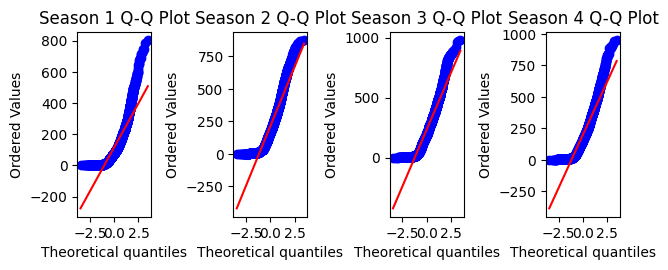

In [49]:
# Check the required assumptions to check the annova

# Normality check to perform (Checking the assumptions for the tests)
# Season Q-Q plots
for i, season in enumerate(range(1, 5), 1):
    plt.subplot(2, 4, i+4)
    stats.probplot(df[df['season'] == season]['count'], dist="norm", plot=plt)
    plt.title(f'Season {season} Q-Q Plot')

plt.tight_layout()
plt.show()

In [50]:
# Levene's test for weather (Checking homogenity of varience)
# Levene's test for season

levene_season = levene(*[df[df['season'] == i]['count'] for i in range(1, 5)])

levene_season

LeveneResult(statistic=np.float64(187.7706624026276), pvalue=np.float64(1.0147116860043298e-118))

In [51]:
# Perform ANOVA
season_groups = [df[df['season'] == season]['count'] for season in df['season'].unique()]

In [52]:
from scipy.stats import f_oneway
f_stat_season, p_value_season = f_oneway(*season_groups)
print(f"F-Statistic: {f_stat_season}, P-Value: {p_value_season}")

if p_value_season < alpha:
    print("Reject the null hypothesis for seaoson: Number of cycles rented is similar in different seasons.")
else:
    print("Fail to reject the null hypothesis for season: Number of cycles rented is different in different seasons.")

F-Statistic: 236.94671081032106, P-Value: 6.164843386499654e-149
Reject the null hypothesis for seaoson: Number of cycles rented is similar in different seasons.


C. No. of cycles rented similar or different in different weather
        
        *  Test: ANOVA : Catogorical having more category than 2 vs Numerical

In [53]:
# 3. Is the number of cycles rented similar or different in different weather conditions?

#H0: Number of cycles rented is similar in different weather.

#Ha: Number of cycles rented has no effect on weather.

# Significance level (alpha): 0.05

In [54]:
# Perform ANOVA
weather_groups = [df[df['weather'] == weather]['count'] for weather in df['weather'].unique()]

C:\Users\chavad\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_stats_py.py:10917: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\chavad\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_stats_py.py:10931: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\chavad\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_stats_py.py:10934: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


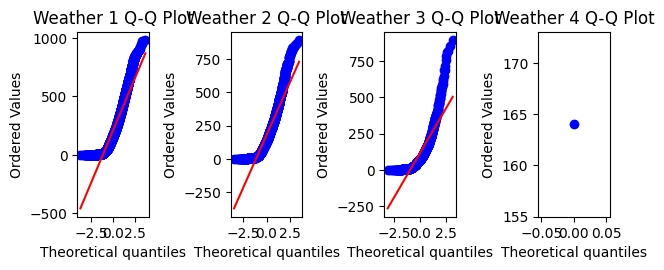

In [55]:
# Normality check to perform (Checking the assumptions for the tests)

# Weather condition Q-Q plots
for i, weather in enumerate(range(1, 5), 1):
    plt.subplot(2, 4, i)
    stats.probplot(df[df['weather'] == weather]['count'], dist="norm", plot=plt)
    plt.title(f'Weather {weather} Q-Q Plot')

plt.tight_layout()
plt.show()

In [56]:
# Levene's test for weather (Checking homogenity of varience)
levene_weather = levene(*[df[df['weather'] == i]['count'] for i in range(1, 5)])

levene_weather

LeveneResult(statistic=np.float64(54.85106195954556), pvalue=np.float64(3.504937946833238e-35))

In [57]:
alpha = 0.05
f_stat_weather, p_value_weather = f_oneway(*weather_groups)
print(f"F-Statistic: {f_stat_weather}, P-Value: {p_value_weather}")

if p_value_weather < alpha:
    print("Reject the null hypothesis for weather: The number of cycles rented differs across different weather conditions.")
else:
    print("Fail to reject the null hypothesis for weather: The number of cycles rented is similar across different weather conditions.")

F-Statistic: 65.53024112793271, P-Value: 5.482069475935669e-42
Reject the null hypothesis for weather: The number of cycles rented differs across different weather conditions.


D. Weather is dependent on season (check between 2 predictor variable)

        *  Test: Chi2 Test : Catogorical  vs Categoricals

In [58]:
# 4. Is weather dependent on season?

# H0: Weather is independent of season

# Ha: Weather is not independent of season

# alpha = 0.05

In [59]:
alpha = 0.05
contingency_table = pd.crosstab(df['season'], df['weather'])
chi2_stat, p_value_chi2, dof, expected = chi2_contingency(contingency_table)

chi2_stat, p_value_chi2, dof, expected

# Print results
print("Working Day Effect:")
print(f"T-statistic: {t_stat_wkday}, P-value: {p_value_wkday}")

print("\nSeason Effect:")
print(f"F-statistic: {f_stat_season}, P-value: {p_value_season}")

print("\nWeather Effect:")
print(f"F-statistic: {f_stat_weather}, P-value: {p_value_weather}")

print("\nWeather Dependency on Season:")
print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value_chi2}")

Working Day Effect:
T-statistic: 1.2096277376026694, P-value: 0.22644804226361348

Season Effect:
F-statistic: 236.94671081032106, P-value: 6.164843386499654e-149

Weather Effect:
F-statistic: 65.53024112793271, P-value: 5.482069475935669e-42

Weather Dependency on Season:
Chi-square statistic: 49.158655596893624, P-value: 1.549925073686492e-07


# Suggestions:

* Focus majorly on bike availability during peak seasons like spring and summer, and offer promotions on clear weather days.

* Implement dynamic pricing basis different scenarios impacting the services like weather, to incentivize rentals during less favorable weather conditions.

* Adjust bike fleet distribution based on seasonal demand, increasing availability in warmer months and reducing it in winter.

* Create weather based marketing campaigns to boost rentals on clear days and offer promotions on rainy days.

* Continuously adapt operations based on extreme weather conditions by reallocating bikes to high-demand zones or indoor storage.

* Educate users about the benefits of cycling in mild weather to stabilize demand across different seasons.

* Segment data by time of day to optimize bike availability and better understand demand patterns.